## Lucy's Work - Auto Encoder Using Neural Network

Autoencoder is an unsupervised artificial neural network that learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.
Autoencoder, by design, reduces data dimensions by learning how to ignore the noise in the data.

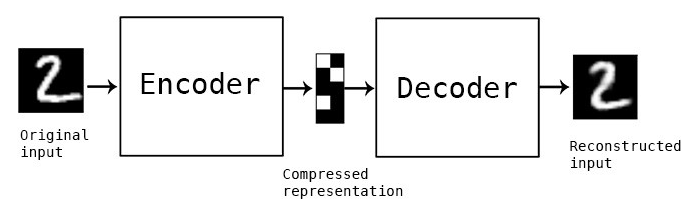

#### Autoencoders consists of 4 main parts:

#### 1- Encoder: 
In which the model learns how to reduce the input dimensions and compress the input data into an encoded representation.
#### 2- Bottleneck/Compressed representation: 
which is the layer that contains the compressed representation of the input data. This is the lowest possible dimensions of the input data.
#### 3- Decoder: 
In which the model learns how to reconstruct the data from the encoded representation to be as close to the original input as possible.
#### 4- Reconstruction Loss: 
This is the method that measures measure how well the decoder is performing and how close the output is to the original input.

The training then involves using back propagation in order to minimize the network’s reconstruction loss.

#### Applications

Data denoising and Dimensionality reduction


### Setting up libraries

In [15]:
# Just to be sure that tensorflow is up and runnig
from __future__ import absolute_import, division, print_function, unicode_literals

# import TensorFlow
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


### Import the MNIST dataset

In [4]:
# Import MINST dataNow, let's give the parameters that are going to be used by our NN.
from tensorflow.examples.tutorials.mnist import input_daNow, let's give the parameters that are going to be used by our NN.ta
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Setting the Neural Network Parameters

In [5]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

### Create Encoder

The Sigmoidal functions is used to create an encoder because it has a good derivative that is well-suited to backpropagation. 
The sigmoidal function is used like this:

In [6]:
# Building the encoder
def encoder(x):
    # Encoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Encoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

### Create Decoder

Note that the layer_1 in the encoder is the layer_2 in the decoder and vice-versa.

In [8]:
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),biases['decoder_b1']))
    # Decoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

### Creating a Model

In the variable cost is the loss function and in the optimizer variable is the gradient used for backpropagation.

In [10]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Reconstructed Images
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

### Training

Recall that training epoch is set to run for 20 epochs

In [11]:
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

Epoch: 0001 cost= 0.219489783
Epoch: 0002 cost= 0.181849584
Epoch: 0003 cost= 0.162647933
Epoch: 0004 cost= 0.151982576
Epoch: 0005 cost= 0.149658903
Epoch: 0006 cost= 0.144833162
Epoch: 0007 cost= 0.140095577
Epoch: 0008 cost= 0.133882329
Epoch: 0009 cost= 0.130888879
Epoch: 0010 cost= 0.126980901
Epoch: 0011 cost= 0.123814769
Epoch: 0012 cost= 0.122641534
Epoch: 0013 cost= 0.120346017
Epoch: 0014 cost= 0.117695183
Epoch: 0015 cost= 0.116601661
Epoch: 0016 cost= 0.115439102
Epoch: 0017 cost= 0.114882633
Epoch: 0018 cost= 0.110457607
Epoch: 0019 cost= 0.109527044
Epoch: 0020 cost= 0.108303010
Optimization Finished!


### Testing

The Encoder and Decoder already is applied on the test set

In [12]:
# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

### Evaluation

To evaluate the model, the original image is compared with the recostructed image as shown below

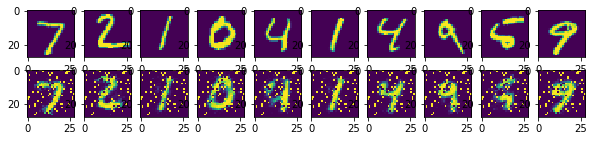

In [13]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))

### Conclusion

As can be seen, the reconstructions were successful. It can be seen that some noise were added to the image. This helps the model to learn more important features from the input image.
Denoising is advocated and investigated as a training criterion for learning to extract useful features that will constitute better higher level representation. 